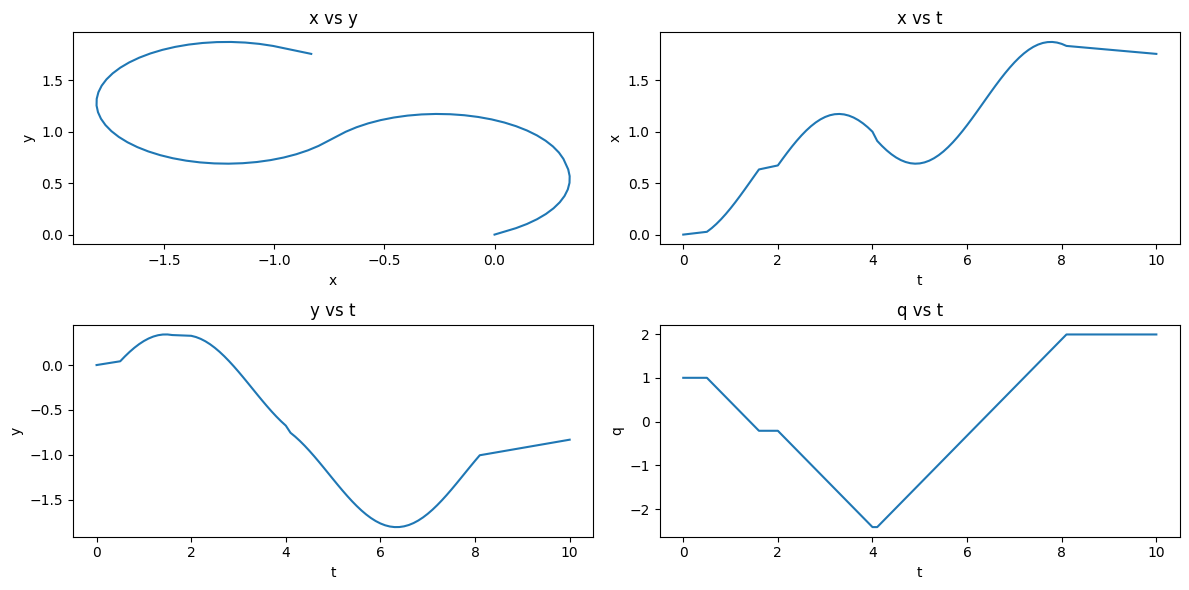

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time step and time range
Dt = 0.1
t = np.arange(0, 10 + Dt, Dt)

# Initialize arrays to store the state variables
x = np.zeros(len(t))
y = np.zeros(len(t))
q = np.zeros(len(t))

# Constants
r = 0.1  # Radius of wheels
L = 1.0  # Distance between wheels

# Initial conditions
x[0] = 0
y[0] = 0
q[0] = 1

# Define the control input functions based on the given conditions
def control_input_u1(t):
    if 4 <= t % 10 <= 6:
        return 12
    elif 6 <= t % 10 <= 8:
        return 12
    else:
        return 1

def control_input_u2(t):
    if 0.5 <= t % 10 <= 1.5:
        return 12
    elif 2 <= t % 10 <= 4:
        return 12
    else:
        return 1

# Simulate the system using Euler's method
for i in range(1, len(t)):
    u1 = control_input_u1(t[i-1])
    u2 = control_input_u2(t[i-1])
    x[i] = x[i-1] + Dt * (r / 2) * (u1 + u2) * np.cos(q[i-1])
    y[i] = y[i-1] + Dt * (r / 2) * (u1 + u2) * np.sin(q[i-1])
    q[i] = q[i-1] + Dt * (r / L) * (u1 - u2)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(y, x)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

plt.subplot(2, 2, 2)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('x vs t')

plt.subplot(2, 2, 3)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('y vs t')

plt.subplot(2, 2, 4)
plt.plot(t, q)
plt.xlabel('t')
plt.ylabel('q')
plt.title('q vs t')

plt.tight_layout()
plt.show()